In [1]:
import numpy as np
from itertools import permutations
def brute_force_tsp(w, N):
    a=list(permutations(range(1,N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j,pre_j]
            pre_j = j
        distance = distance + w[pre_j,0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print('order = ' + str(order) + ' Distance = ' + str(distance))
    return last_best_distance, best_order

insfils=['neuc_shape1','neuc_shape2','neuc_shape3','euc_shape1','euc_shape2','euc_shape3']
costs=[]
orders=[]
for i in range(0,len(insfils)):
    D = np.loadtxt('instances/'+insfils[i]+'.txt',  delimiter=',') 
    cost,order=brute_force_tsp(D, 4)
    costs.append(cost)
    orders.append(order)
    
    
    


order = (0, 1, 2, 3) Distance = 24.80065509
order = (0, 2, 1, 3) Distance = 23.8951137
order = (0, 1, 2, 3) Distance = 65.76070403
order = (0, 1, 2, 3) Distance = 51.381437919999996
order = (0, 1, 3, 2) Distance = 44.55872038
order = (0, 1, 2, 3) Distance = 48.69773831
order = (0, 2, 1, 3) Distance = 48.130675090000004
order = (0, 1, 2, 3) Distance = 30.655645409999998
order = (0, 1, 2, 3) Distance = 34.11246652
order = (0, 1, 3, 2) Distance = 32.53962616


In [2]:
print(costs)

[23.8951137, 65.76070403, 44.55872038, 48.130675090000004, 30.655645409999998, 32.53962616]


In [5]:
filestr='results/qaoa/qaoa_euc_shape1_paramseed-10_p-1.txt'
def get_info(filestr):
    f = open(filestr, "r")
    data=f.read()
    f.close()
    ind1=data.find('optimal function value:')
    ind2=data.find('optimal value:')
    ind3=data.find('status:')
    obj=data[ind1+23:ind2].strip()
    bit=data[ind2+16:ind3-2].strip()
    bit=bit.replace('.','')
    bit=bit.replace(' ','')
    return obj, bit



In [6]:
def check_feas(bits):
    vec=[]
    for i in range(0,len(bits)):
        vec.append(float(bits[i]))
    vec=np.array(vec)  
    vec.resize((4, 4))  
    v11=vec[0,:]
    v12=vec[1,:]
    v13=vec[2,:]
    v14=vec[3,:]
    v21=vec[:,0]
    v22=vec[:,1]
    v23=vec[:,2]
    v24=vec[:,3]
    s1=np.sum(v11)
    s2=np.sum(v12)
    s3=np.sum(v13)
    s4=np.sum(v14)
    s5=np.sum(v21)
    s6=np.sum(v22)
    s7=np.sum(v23)
    s8=np.sum(v24)
    fin=[s1,s2,s3,s4,s5,s6,s7,s8]
    for i in fin:
        if i!=1:
            return 0
    return 1


In [7]:
import os
typ='qaoa'
insfils=['neuc_shape1','neuc_shape2','neuc_shape3','euc_shape1','euc_shape2','euc_shape3']
qaoafeasper=[]
qaoaapprox=[]
qaoaapproxf=[]
for p in range(1,21):
    feas=0
    total=0
    appr=[]
    apprf=[]
    for j in range(1,21):
        for i in range(0,len(insfils)):
            filestr='results/qaoa/qaoa_'+insfils[i]+'_paramseed-'+str(j)+'_p-'+str(p)+'.txt'
            obj,bit=get_info(filestr)
            ap=costs[i]/float(obj)
            appr.append(ap)
            fe=check_feas(bit)  
            if fe==1:
                feas=feas+1
                total=total+1
                apprf.append(ap)
            else:
                total=total+1
    feasp=feas/total
    qaoafeasper.append(feasp)
    appr=np.array(appr)
    apprf=np.array(apprf)
    qaoaapprox.append(np.average(appr))
    qaoaapproxf.append(np.average(apprf))



In [9]:
typ='wsqaoa'
insfils=['neuc_shape1','neuc_shape2','neuc_shape3','euc_shape1','euc_shape2','euc_shape3']
wsqaoafeasper=[]
wsqaoaapprox=[]
wsqaoaapproxf=[]
for p in range(1,21):
    feas=0
    total=0
    appr=[]
    apprf=[]
    for j in range(1,21):
        for i in range(0,len(insfils)):
            filestr='results/wsqaoa/wsqaoa_'+insfils[i]+'_paramseed-'+str(j)+'_p-'+str(p)+'.txt'
            obj,bit=get_info(filestr)
            ap=costs[i]/float(obj)
            appr.append(ap)
            fe=check_feas(bit)  
            if fe==1:
                feas=feas+1
                total=total+1
                apprf.append(ap)
            else:
                total=total+1
    feasp=feas/total
    wsqaoafeasper.append(feasp)
    appr=np.array(appr)
    apprf=np.array(apprf)
    wsqaoaapprox.append(np.average(appr))
    wsqaoaapproxf.append(np.average(apprf))



In [10]:
sp=['0213']
#we have all for 0213
insfils=['neuc_shape1','neuc_shape2','neuc_shape3','euc_shape1','euc_shape2','euc_shape3']
hadfeasper=[]
hadapprox=[]
hadapproxf=[]
for p in range(1,21):
    feas=0
    total=0
    appr=[]
    apprf=[]
    for j in range(1,21):
        for i in range(0,len(insfils)):
            for s in sp:
                filestr='results/hadfield/hadfield_'+insfils[i]+'_paramseed-'+str(j)+'_sp-'+str(s)+'_p-'+str(p)+'.txt'
                obj,bit=get_info(filestr)
                ap=costs[i]/float(obj)
                appr.append(ap)
                fe=check_feas(bit)  
                if fe==1:
                    feas=feas+1
                    total=total+1
                    apprf.append(ap)
                else:
                    total=total+1
    feasp=feas/total
    hadfeasper.append(feasp)
    appr=np.array(appr)
    apprf=np.array(apprf)
    hadapprox.append(np.average(appr))
    hadapproxf.append(np.average(apprf))



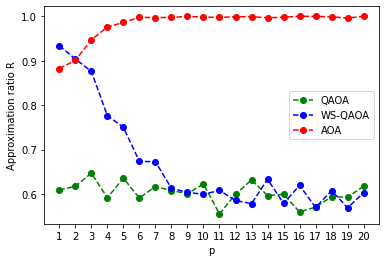

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special


p = np.arange(1, 21, 1)
plt.plot(p, qaoaapprox, color='green', marker='o', linestyle='dashed', label="QAOA")
plt.plot(p, wsqaoaapprox, color='blue', marker='o', linestyle='dashed', label="WS-QAOA")
plt.plot(p, hadapprox, color='red', marker='o', linestyle='dashed', label="AOA")
plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc='center right')

plt.ylabel('Approximation ratio R')
plt.xlabel('p')
plt.show()





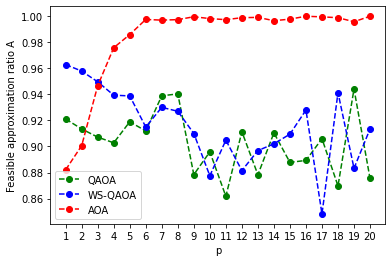

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, qaoaapproxf, color='green', marker='o', linestyle='dashed', label="QAOA")
plt.plot(p, wsqaoaapproxf, color='blue', marker='o', linestyle='dashed', label="WS-QAOA")
plt.plot(p, hadapproxf, color='red', marker='o', linestyle='dashed', label="AOA")
plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="lower left")

plt.ylabel('Feasible approximation ratio A')
plt.xlabel('p')
plt.show()


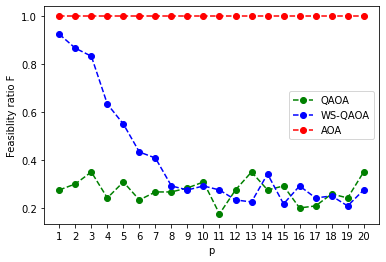

In [13]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, qaoafeasper, color='green', marker='o', linestyle='dashed', label="QAOA")
plt.plot(p, wsqaoafeasper, color='blue', marker='o', linestyle='dashed', label="WS-QAOA")
plt.plot(p, hadfeasper, color='red', marker='o', linestyle='dashed', label="AOA")
plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="center right")

plt.ylabel('Feasiblity ratio F')
plt.xlabel('p')

plt.show()





In [14]:

def get_info_gs(filestr):
    f = open(filestr, "r")
    data=f.read()
    f.close()
    nd=data.split('||')
    edges=nd[0]
    obj=nd[1]
    obj=float(obj.strip())
    edges=edges.strip()
    edges=list(edges)
    edge=[]
    fedge=[]
    for j in edges:
        try:
            edge.append(int(j))
        except:
            pass
    for j in range(0,len(edge),2):
        fedge.append((edge[j],edge[j+1]))
    return obj, fedge


In [15]:

def check_feas_gs(edge):
    if len(edges)!=4:
        return 0
    c1=0
    c2=0
    c3=0
    c4=0
    for i in edges:
        if 0 in i:
            c1=c1+1
        if 1 in i:
            c2=c2+1
        if 2 in i:
            c3=c3+1
        if 3 in i:
            c4=c4+1
    if c1!=2:
        return 0
    if c2!=2:
        return 0
    if c3!=2:
        return 0
    if c4!=2:
        return 0
    for i in edges:
        ri=(i[1],i[0])
        if ri in edges:
            return 0
    return 1




In [16]:
sp=['none']
gsfeasper1=[]
gsapprox1=[]
gsapproxf1=[]
for p in range(1,21):
    feas=0
    total=0
    appr=[]
    apprf=[]
    for j in range(1,21):
        for i in range(0,len(insfils)):
            for s in sp:
                filestr='results/gsaoa/gaaoa_'+insfils[i]+'_paramseed-'+str(j)+'_sp-'+str(s)+'_p-'+str(p)+'.txt'
                obj,edges=get_info_gs(filestr)
                ap=costs[i]/float(obj)
                appr.append(ap)
                fe=check_feas_gs(edges)  
                if fe==1:
                    feas=feas+1
                    total=total+1
                    apprf.append(ap)
                else:
                    total=total+1
    feasp=feas/total
    gsfeasper1.append(feasp)
    appr=np.array(appr)
    apprf=np.array(apprf)
    gsapprox1.append(np.average(appr))
    gsapproxf1.append(np.average(apprf))



In [17]:
insfils=['neuc_shape1','neuc_shape2','neuc_shape3','euc_shape1','euc_shape2','euc_shape3']
sp=['shape1']
gsfeasper2=[]
gsapprox2=[]
gsapproxf2=[]
for p in range(1,21):
    feas=0
    total=0
    appr=[]
    apprf=[]
    for j in range(1,21):
        for i in range(0,len(insfils)):
            for s in sp:
                filestr='results/gsaoa/gaaoa_'+insfils[i]+'_paramseed-'+str(j)+'_sp-'+str(s)+'_p-'+str(p)+'.txt'
                obj,edges=get_info_gs(filestr)
                ap=costs[i]/float(obj)
                appr.append(ap)
                fe=check_feas_gs(edges)  
                if fe==1:
                    feas=feas+1
                    total=total+1
                    apprf.append(ap)
                else:
                    total=total+1
    feasp=feas/total
    gsfeasper2.append(feasp)
    appr=np.array(appr)
    apprf=np.array(apprf)
    gsapprox2.append(np.average(appr))
    gsapproxf2.append(np.average(apprf))



In [18]:
insfils=['neuc_shape1','neuc_shape2','neuc_shape3','euc_shape1','euc_shape2','euc_shape3']
sp=['shape2']
gsfeasper3=[]
gsapprox3=[]
gsapproxf3=[]
for p in range(1,21):
    feas=0
    total=0
    appr=[]
    apprf=[]
    for j in range(1,21):
        for i in range(0,len(insfils)):
            for s in sp:
                filestr='results/gsaoa/gaaoa_'+insfils[i]+'_paramseed-'+str(j)+'_sp-'+str(s)+'_p-'+str(p)+'.txt'
                obj,edges=get_info_gs(filestr)
                ap=costs[i]/float(obj)
                appr.append(ap)
                fe=check_feas_gs(edges)  
                if fe==1:
                    feas=feas+1
                    total=total+1
                    apprf.append(ap)
                else:
                    total=total+1
    feasp=feas/total
    gsfeasper3.append(feasp)
    appr=np.array(appr)
    apprf=np.array(apprf)
    gsapprox3.append(np.average(appr))
    gsapproxf3.append(np.average(apprf))



In [19]:
insfils=['neuc_shape1','neuc_shape2','neuc_shape3','euc_shape1','euc_shape2','euc_shape3']
sp=['shape3']
gsfeasper4=[]
gsapprox4=[]
gsapproxf4=[]
for p in range(1,21):
    feas=0
    total=0
    appr=[]
    apprf=[]
    for j in range(1,21):
        for i in range(0,len(insfils)):
            for s in sp:
                filestr='results/gsaoa/gaaoa_'+insfils[i]+'_paramseed-'+str(j)+'_sp-'+str(s)+'_p-'+str(p)+'.txt'
                obj,edges=get_info_gs(filestr)
                ap=costs[i]/float(obj)
                appr.append(ap)
                fe=check_feas_gs(edges)  
                if fe==1:
                    feas=feas+1
                    total=total+1
                    apprf.append(ap)
                else:
                    total=total+1
    feasp=feas/total
    gsfeasper4.append(feasp)
    appr=np.array(appr)
    apprf=np.array(apprf)
    gsapprox4.append(np.average(appr))
    gsapproxf4.append(np.average(apprf))



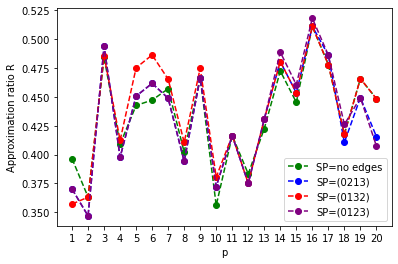

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, gsapprox1, color='green', marker='o', linestyle='dashed', label="SP=no edges")
plt.plot(p, gsapprox2, color='blue', marker='o', linestyle='dashed', label="SP=(0213)")
plt.plot(p, gsapprox3, color='red', marker='o', linestyle='dashed', label="SP=(0132)")
plt.plot(p, gsapprox4, color='purple', marker='o', linestyle='dashed', label="SP=(0123)")
plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="lower right")

plt.ylabel('Approximation ratio R')
plt.xlabel('p')


plt.show()





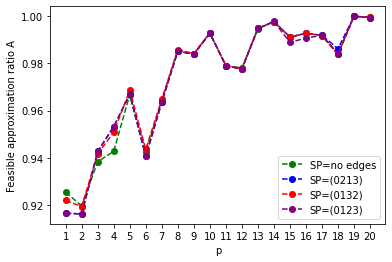

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, gsapproxf1, color='green', marker='o', linestyle='dashed', label="SP=no edges")
plt.plot(p, gsapproxf2, color='blue', marker='o', linestyle='dashed', label="SP=(0213)")
plt.plot(p, gsapproxf3, color='red', marker='o', linestyle='dashed', label="SP=(0132)")
plt.plot(p, gsapproxf4, color='purple', marker='o', linestyle='dashed', label="SP=(0123)")
plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="lower right")

plt.ylabel('Feasible approximation ratio A')
plt.xlabel('p')

plt.show()





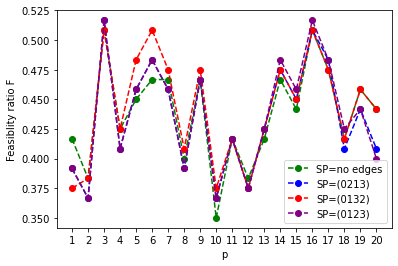

In [23]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, gsfeasper1, color='green', marker='o', linestyle='dashed', label="SP=no edges")
plt.plot(p, gsfeasper2, color='blue', marker='o', linestyle='dashed', label="SP=(0213)")
plt.plot(p, gsfeasper3, color='red', marker='o', linestyle='dashed', label="SP=(0132)")
plt.plot(p, gsfeasper4, color='purple', marker='o', linestyle='dashed', label="SP=(0123)")
plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="lower right")

plt.ylabel('Feasiblity ratio F')
plt.xlabel('p')


plt.show()





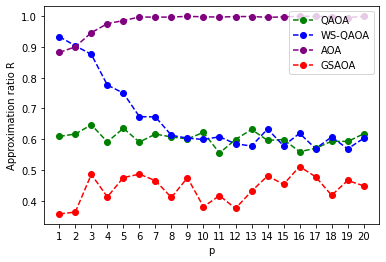

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, qaoaapprox, color='green', marker='o', linestyle='dashed', label="QAOA")
plt.plot(p, wsqaoaapprox, color='blue', marker='o', linestyle='dashed', label="WS-QAOA")
plt.plot(p, hadapprox, color='purple', marker='o', linestyle='dashed', label="AOA")
plt.plot(p, gsapprox3, color='red', marker='o', linestyle='dashed', label="GSAOA")

plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="upper right")
plt.ylabel('Approximation ratio R')

plt.xlabel('p')


plt.show()





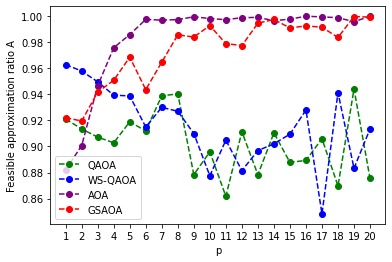

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, qaoaapproxf, color='green', marker='o', linestyle='dashed', label="QAOA")
plt.plot(p, wsqaoaapproxf, color='blue', marker='o', linestyle='dashed', label="WS-QAOA")
plt.plot(p, hadapproxf, color='purple', marker='o', linestyle='dashed', label="AOA")
plt.plot(p, gsapproxf3, color='red', marker='o', linestyle='dashed', label="GSAOA")

plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="lower left")

plt.ylabel('Feasible approximation ratio A')
plt.xlabel('p')


plt.show()





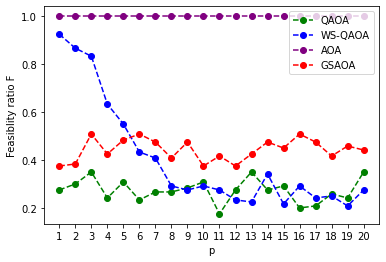

In [27]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.special



p = np.arange(1, 21, 1)
plt.plot(p, qaoafeasper, color='green', marker='o', linestyle='dashed', label="QAOA")
plt.plot(p, wsqaoafeasper, color='blue', marker='o', linestyle='dashed', label="WS-QAOA")
plt.plot(p, hadfeasper, color='purple', marker='o', linestyle='dashed', label="AOA")
plt.plot(p, gsfeasper3, color='red', marker='o', linestyle='dashed', label="GSAOA")
plt.xticks(np.arange(min(p), max(p)+1, 1.0))
plt.legend(loc="upper right")

plt.ylabel('Feasiblity ratio F')
plt.xlabel('p')

plt.show()






